# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset
df = pd.read_csv('Dataset_clustering.csv')
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,Moderate,12.597558,2062.983982,1030.943616,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1.0,93.769249,3
1,Fish Carrier,Short-haul,Steam Turbine,Good,Rough,10.387580,1796.057415,1060.486382,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,2
2,Container Ship,Long-haul,Diesel,Fair,Moderate,20.749747,1648.556685,658.874144,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,3
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate,21.055102,915.261795,1126.822519,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,0
4,Fish Carrier,Transoceanic,Diesel,Fair,Moderate,13.742777,1089.721803,1445.281159,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
object_df = df.select_dtypes(include='object').columns.tolist()
numeric_df = df.select_dtypes(exclude='object').columns.tolist()[:-1]

In [4]:
data_encoded = df.copy()
for col in object_df:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    
data_encoded.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,1,1,1,0,1,12.597558,2062.983982,1030.943616,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1.0,93.769249,3
1,2,2,2,2,2,10.387580,1796.057415,1060.486382,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,2
2,1,1,0,1,1,20.749747,1648.556685,658.874144,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,3
3,0,3,2,1,1,21.055102,915.261795,1126.822519,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,0
4,2,3,0,1,1,13.742777,1089.721803,1445.281159,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,2


In [5]:
# memisahkan data menjadi fitur dan target
X = data_encoded.drop('Cluster', axis=1)
y = data_encoded['Cluster']

# memisahkan data menjadi 20% data uji dan 80% data pelatihan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=113, random_state=50)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=113, random_state=50)

Algoritma yg saya gunakan adalah <ins>Random Forest</ins> dimana terdiri dari banyak pohon keputusan atau decision trees. Setiap pohon keputusan di dalam hutan (forest) berkotribusi untuk menentukan hasil prediksi akhirnya. Setiap pohon di latih dengan subset data yg dipilih secara acak dari dataset pelatihan dan setiap keputusan pada pohon-pohon akan diambil berdasarkan subset fitur yg dipilih secara random atau acak.<br>
Parameter yg digunakan yaitu:
- **n_estimator=113,** parameter ini untuk menentukan jumlah pohon keputusan yg akan dibandung pada hutan yakni sejumlah 113 pohon.
- **random_state=50,** parameter ini untuk memastikan bahwa hasil tetap konsisten setiap kali algoritma dijalankan.

Pada proses pelatihan pada model ini menggunakan data latih yakni _x_train_ diguankan sebagai fitur atau input untuk melatih model. Sedangkan, _y_train_ berfungsi sebagai target atau label yg akan diprediksi oleh model. Pada dataset ini hasil clustering yaitu cluster digunakan sebagai target yg ingin diprediksi berdasarkan fitur-fitur tersebut.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

=== Metrik RandomForestClassifier ===
Akurasi: Train = 100.00% | Test = 99.45%
Presisi: Train = 1.00 | Test = 0.99
Recall: Train = 1.00 | Test = 0.99
F1: Train = 1.00 | Test = 0.99


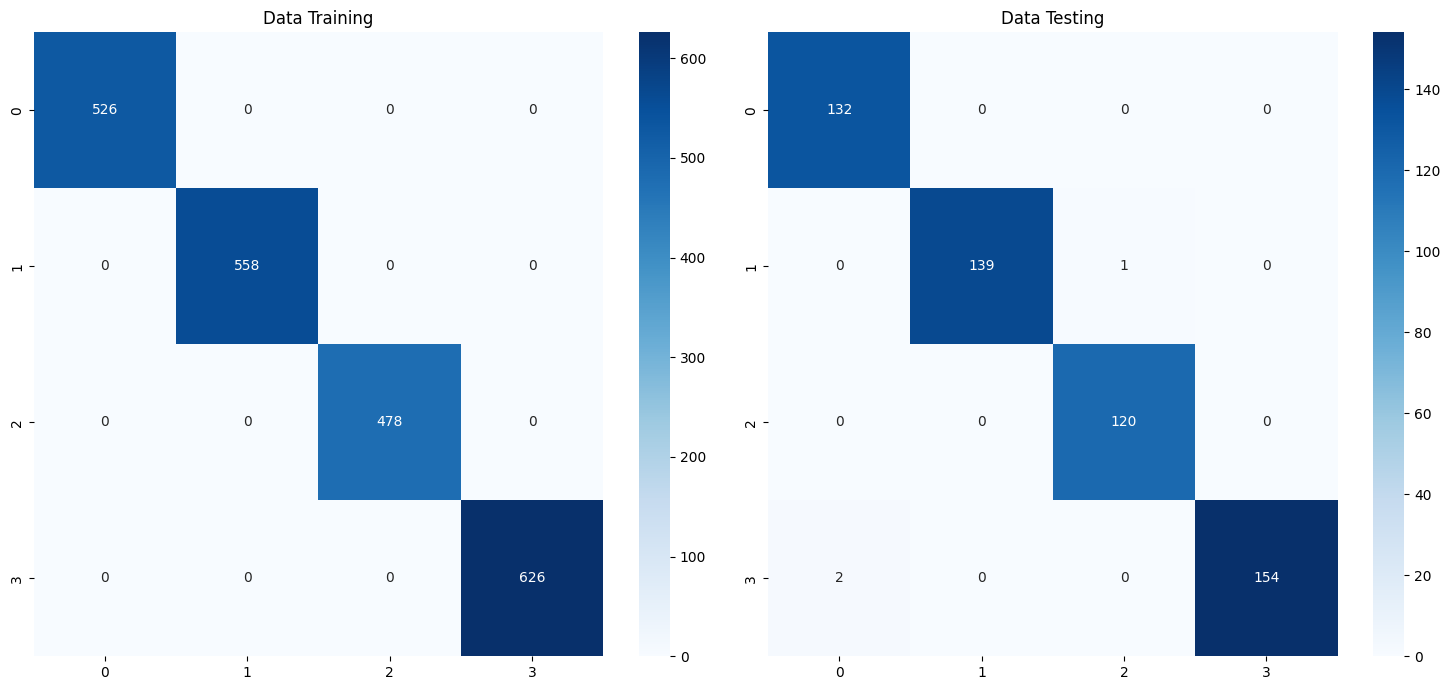

In [7]:
def model_performance(model, X_train, y_train, X_test, y_test):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    nama_model = model.__class__.__name__
    print(f"=== Metrik {nama_model} ===")
    
    metrik_fungsi = [
        ("Akurasi", lambda y, yp: accuracy_score(y, yp) * 100, "%.2f%%"),
        ("Presisi", lambda y, yp: precision_score(y, yp, average='micro'), "%.2f"),
        ("Recall", lambda y, yp: recall_score(y, yp, average='micro'), "%.2f"),
        ("F1", lambda y, yp: f1_score(y, yp, average='micro'), "%.2f")
    ]
    
    for nama, fungsi, format_str in metrik_fungsi:
        nilai_train = fungsi(y_train, pred_train)
        nilai_test = fungsi(y_test, pred_test)
        
        if format_str.endswith("%%"):
            print(f"{nama}: Train = {nilai_train:.2f}% | Test = {nilai_test:.2f}%")
        else:
            print(f"{nama}: Train = {nilai_train:.2f} | Test = {nilai_test:.2f}")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    
    sns.heatmap(confusion_matrix(y_train, pred_train), annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Data Training')
    sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='Blues', ax=ax2)
    ax2.set_title('Data Testing')
    plt.tight_layout()
    plt.show()

model_performance(rf_classifier, X_train, y_train, X_test, y_test)

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [8]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [9]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi model klasifikasi diatas, dapat diketahui bahwa:
- Untuk analisis kinerja modelnya dari akurasi memberikan tingkatan yg sangat baik dengan akurasi yg sangat tinggi pada data pelatihan (100%) dan sedikit penurunan pada data pengujian (99.45%) tetapi penurunan akurasi ini sangat kecil sehingga model ini tidak menujukkan overfitting yg signifikan. Lalu, untuk presisi dan recall memiliki nilai yg sangat tinggi dikedua data sehingga model dapat melakukan generalisasi dengan baik. Pada F1-score yakni 1.00 untuk data latih dan 0.99 untuk data uji menunjukkan keseimbangan yg baik antara presisi dan recall sehingga model ini cenderung akurat dalam memprediksi kelas yg benar dan memiliki sedikit kesalahan.
- Kelemahan pada model ini ditemukan pada data testing yg meskipun sebagai besar data diklasifikasikan dengan benar, tetapi pada cluster 0 terdapat 2 prediksi yg salah. Sedangkan pada cluster 2 terdapat 1 prediksi salah. Namun berdasarkan presisi dan recall yg tinggi kesalahan tersebut dapat dibilang tidak terlalu signifikan.